In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
# Adjust the filename based on what you downloaded
df = pd.read_csv('../data/Bank_Transaction_Fraud_Detection.csv')  # or whatever your file is named

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")

Dataset loaded successfully!
Shape: (200000, 24)
Rows: 200,000, Columns: 24


In [4]:
# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())
print("\n" + "="*80 + "\n")

# Column names and data types
print("Column names and data types:")
print(df.dtypes)
print("\n" + "="*80 + "\n")

# Basic info
print("Dataset Info:")
df.info()

First 5 rows of the dataset:
                            Customer_ID        Customer_Name  Gender  Age  \
0  d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e           Osha Tella    Male   60   
1  7c14ad51-781a-4db9-b7bd-67439c175262      Hredhaan Khosla  Female   51   
2  3a73a0e5-d4da-45aa-85f3-528413900a35       Ekani Nazareth    Male   20   
3  7902f4ef-9050-4a79-857d-9c2ea3181940  Yamini Ramachandran  Female   57   
4  3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9         Kritika Rege  Female   43   

         State                City                Bank_Branch Account_Type  \
0       Kerala  Thiruvananthapuram  Thiruvananthapuram Branch      Savings   
1  Maharashtra              Nashik              Nashik Branch     Business   
2        Bihar           Bhagalpur           Bhagalpur Branch      Savings   
3   Tamil Nadu             Chennai             Chennai Branch     Business   
4       Punjab            Amritsar            Amritsar Branch      Savings   

                         Transaction_ID

In [5]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*80 + "\n")

# Basic statistical summary for numerical columns
print("Statistical Summary of Numerical Features:")
print(df.describe())
print("\n" + "="*80 + "\n")

# Check unique values for categorical columns (sample)
print("Unique values in key categorical columns:")
categorical_cols = ['Gender', 'Account_Type', 'Transaction_Type', 'Merchant_Category', 
                    'Transaction_Device', 'Device_Type']
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values - {df[col].unique()[:5]}")

Missing Values:
Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64


Statistical Summary of Numerical Features:
             Age  Transaction_Amount  Account_Balance   Is_Fraud
count 200000.000          200000.000       200000.000 200000.000
mean      44.015           49538.016        52437.989      0.050
std       15.289           28551.87

TARGET VARIABLE ANALYSIS: Is_Fraud Distribution

Fraud Distribution:
Is_Fraud
0    189912
1     10088
Name: count, dtype: int64

Percentage Distribution:
Is_Fraud
0   94.956
1    5.044
Name: proportion, dtype: float64

Total Transactions: 200,000
Fraudulent Transactions: 10,088 (5.04%)
Non-Fraudulent Transactions: 189,912 (94.96%)
Imbalance Ratio: 1:18.83


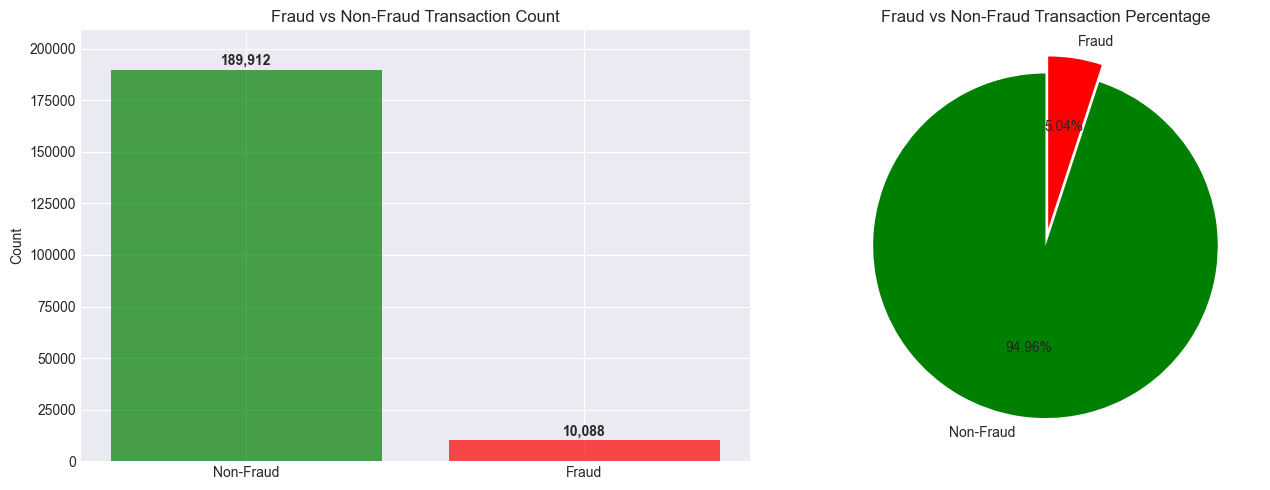

In [6]:
# This is critical - check the fraud distribution
print("="*80)
print("TARGET VARIABLE ANALYSIS: Is_Fraud Distribution")
print("="*80)

# Count and percentage
fraud_counts = df['Is_Fraud'].value_counts()
fraud_percentage = df['Is_Fraud'].value_counts(normalize=True) * 100

print("\nFraud Distribution:")
print(fraud_counts)
print("\nPercentage Distribution:")
print(fraud_percentage)

# Calculate the exact imbalance ratio
fraud_cases = fraud_counts[1]
non_fraud_cases = fraud_counts[0]
imbalance_ratio = non_fraud_cases / fraud_cases

print(f"\nTotal Transactions: {len(df):,}")
print(f"Fraudulent Transactions: {fraud_cases:,} ({fraud_percentage[1]:.2f}%)")
print(f"Non-Fraudulent Transactions: {non_fraud_cases:,} ({fraud_percentage[0]:.2f}%)")
print(f"Imbalance Ratio: 1:{imbalance_ratio:.2f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(['Non-Fraud', 'Fraud'], fraud_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_ylabel('Count')
axes[0].set_title('Fraud vs Non-Fraud Transaction Count')
axes[0].set_ylim(0, fraud_counts.max() * 1.1)
for i, v in enumerate(fraud_counts.values):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(fraud_counts.values, labels=['Non-Fraud', 'Fraud'], autopct='%1.2f%%',
            colors=['green', 'red'], startangle=90, explode=[0, 0.1])
axes[1].set_title('Fraud vs Non-Fraud Transaction Percentage')

plt.tight_layout()
plt.show()

TRANSACTION AMOUNT ANALYSIS

Transaction Amount Statistics by Fraud Status:
              count      mean       std    min       25%       50%       75%  \
Is_Fraud                                                                       
0        189912.000 49551.831 28541.882 10.290 24877.685 49517.420 74326.872   
1         10088.000 49277.925 28739.519 10.410 24420.043 49162.945 74068.717   

               max  
Is_Fraud            
0        98999.980  
1        98999.020  


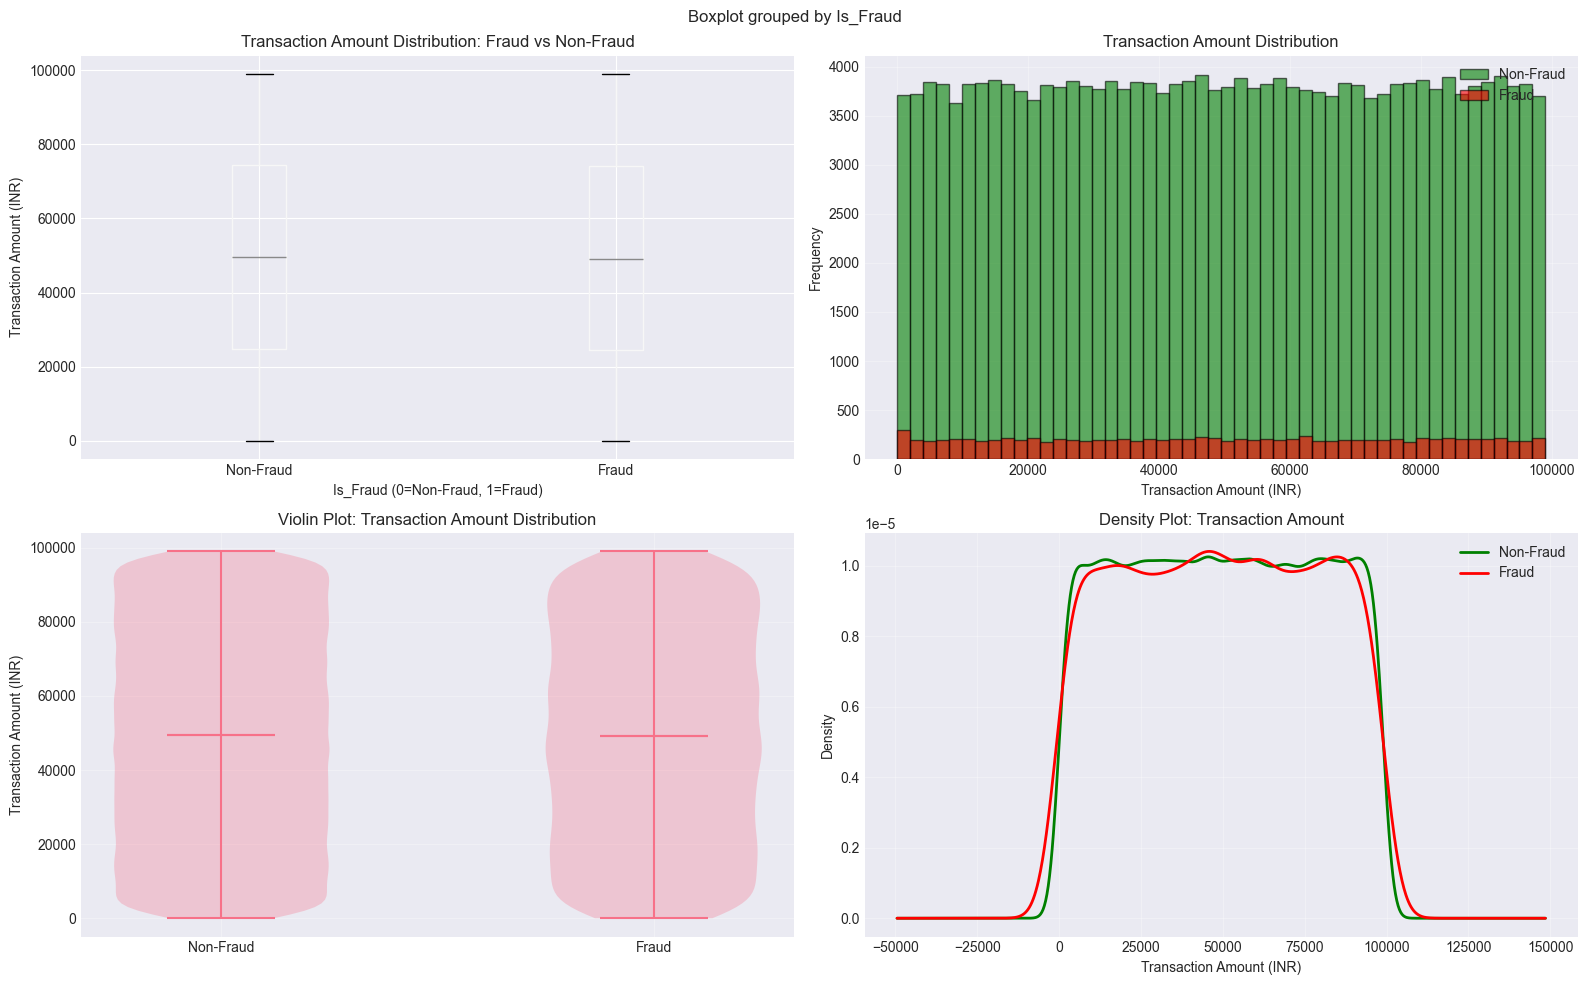


T-test Results:
T-statistic: -0.9389
P-value: 0.347771
✗ No significant difference in transaction amounts


In [7]:
# Compare transaction amounts between fraud and non-fraud
print("="*80)
print("TRANSACTION AMOUNT ANALYSIS")
print("="*80)

# Statistical comparison
print("\nTransaction Amount Statistics by Fraud Status:")
print(df.groupby('Is_Fraud')['Transaction_Amount'].describe())

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Box plot
df.boxplot(column='Transaction_Amount', by='Is_Fraud', ax=axes[0, 0])
axes[0, 0].set_title('Transaction Amount Distribution: Fraud vs Non-Fraud')
axes[0, 0].set_xlabel('Is_Fraud (0=Non-Fraud, 1=Fraud)')
axes[0, 0].set_ylabel('Transaction Amount (INR)')
plt.sca(axes[0, 0])
plt.xticks([1, 2], ['Non-Fraud', 'Fraud'])

# 2. Histogram comparison
axes[0, 1].hist(df[df['Is_Fraud']==0]['Transaction_Amount'], bins=50, alpha=0.6, 
                label='Non-Fraud', color='green', edgecolor='black')
axes[0, 1].hist(df[df['Is_Fraud']==1]['Transaction_Amount'], bins=50, alpha=0.6, 
                label='Fraud', color='red', edgecolor='black')
axes[0, 1].set_xlabel('Transaction Amount (INR)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Transaction Amount Distribution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Violin plot
fraud_data = df[df['Is_Fraud']==1]['Transaction_Amount']
non_fraud_data = df[df['Is_Fraud']==0]['Transaction_Amount']
axes[1, 0].violinplot([non_fraud_data, fraud_data], positions=[0, 1], showmeans=True, showmedians=True)
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Non-Fraud', 'Fraud'])
axes[1, 0].set_ylabel('Transaction Amount (INR)')
axes[1, 0].set_title('Violin Plot: Transaction Amount Distribution')
axes[1, 0].grid(True, alpha=0.3)

# 4. KDE plot
df[df['Is_Fraud']==0]['Transaction_Amount'].plot(kind='kde', ax=axes[1, 1], 
                                                   label='Non-Fraud', color='green', linewidth=2)
df[df['Is_Fraud']==1]['Transaction_Amount'].plot(kind='kde', ax=axes[1, 1], 
                                                   label='Fraud', color='red', linewidth=2)
axes[1, 1].set_xlabel('Transaction Amount (INR)')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Density Plot: Transaction Amount')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical test - Are the means significantly different?
from scipy import stats
fraud_amounts = df[df['Is_Fraud']==1]['Transaction_Amount']
non_fraud_amounts = df[df['Is_Fraud']==0]['Transaction_Amount']
t_stat, p_value = stats.ttest_ind(fraud_amounts, non_fraud_amounts)
print(f"\nT-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")
if p_value < 0.05:
    print("✓ Transaction amounts are SIGNIFICANTLY DIFFERENT between fraud and non-fraud!")
else:
    print("✗ No significant difference in transaction amounts")

AGE ANALYSIS

Age Statistics by Fraud Status:
              count   mean    std    min    25%    50%    75%    max
Is_Fraud                                                            
0        189912.000 44.020 15.290 18.000 31.000 44.000 57.000 70.000
1         10088.000 43.914 15.265 18.000 31.000 44.000 57.000 70.000


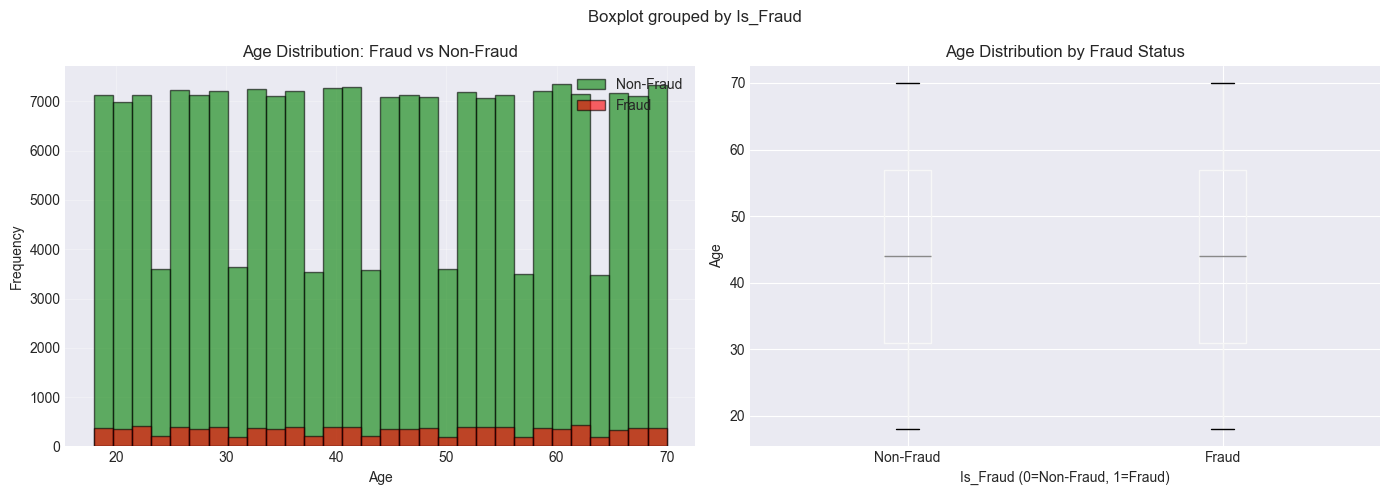


Age Range Analysis:
           Fraud_Count  Total_Count  Fraud_Rate
Age_Group                                      
18-29             2494        48915       5.099
30-39             1916        37943       5.050
40-49             1879        37670       4.988
50-59             1915        37619       5.091
60-70             1884        37853       4.977


In [8]:
print("="*80)
print("AGE ANALYSIS")
print("="*80)

# Age statistics by fraud status
print("\nAge Statistics by Fraud Status:")
print(df.groupby('Is_Fraud')['Age'].describe())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age distribution
axes[0].hist(df[df['Is_Fraud']==0]['Age'], bins=30, alpha=0.6, 
             label='Non-Fraud', color='green', edgecolor='black')
axes[0].hist(df[df['Is_Fraud']==1]['Age'], bins=30, alpha=0.6, 
             label='Fraud', color='red', edgecolor='black')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution: Fraud vs Non-Fraud')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
df.boxplot(column='Age', by='Is_Fraud', ax=axes[1])
axes[1].set_title('Age Distribution by Fraud Status')
axes[1].set_xlabel('Is_Fraud (0=Non-Fraud, 1=Fraud)')
axes[1].set_ylabel('Age')
plt.sca(axes[1])
plt.xticks([1, 2], ['Non-Fraud', 'Fraud'])

plt.tight_layout()
plt.show()

# Age ranges analysis
print("\nAge Range Analysis:")
age_bins = [18, 30, 40, 50, 60, 70]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-70']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

age_fraud_rate = df.groupby('Age_Group')['Is_Fraud'].agg(['sum', 'count', 'mean'])
age_fraud_rate.columns = ['Fraud_Count', 'Total_Count', 'Fraud_Rate']
age_fraud_rate['Fraud_Rate'] = age_fraud_rate['Fraud_Rate'] * 100
print(age_fraud_rate)

CATEGORICAL FEATURES ANALYSIS

GENDER ANALYSIS
        Fraud_Count  Total_Count  Fraud_Rate
Gender                                      
Male           5081       100452       5.058
Female         5007        99548       5.030


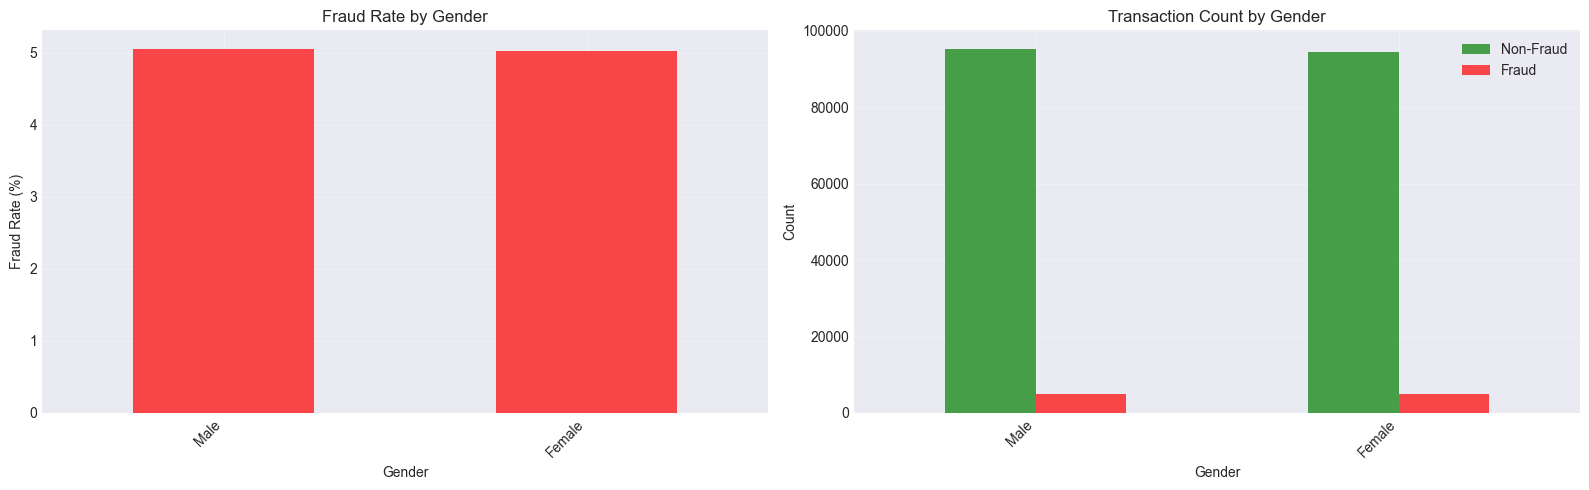


ACCOUNT_TYPE ANALYSIS
              Fraud_Count  Total_Count  Fraud_Rate
Account_Type                                      
Business             3436        66483       5.168
Savings              3349        66593       5.029
Checking             3303        66924       4.935


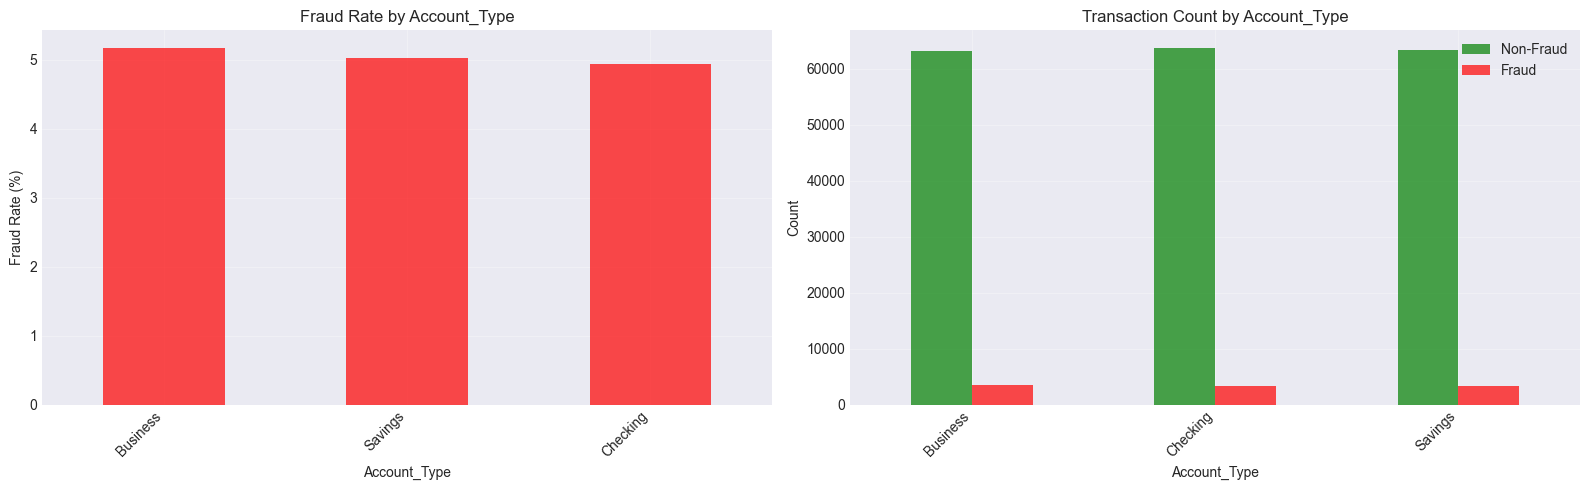


TRANSACTION_TYPE ANALYSIS
                  Fraud_Count  Total_Count  Fraud_Rate
Transaction_Type                                      
Transfer                 2073        39953       5.189
Credit                   2048        40180       5.097
Debit                    2033        40050       5.076
Withdrawal               1961        39777       4.930
Bill Payment             1973        40040       4.928


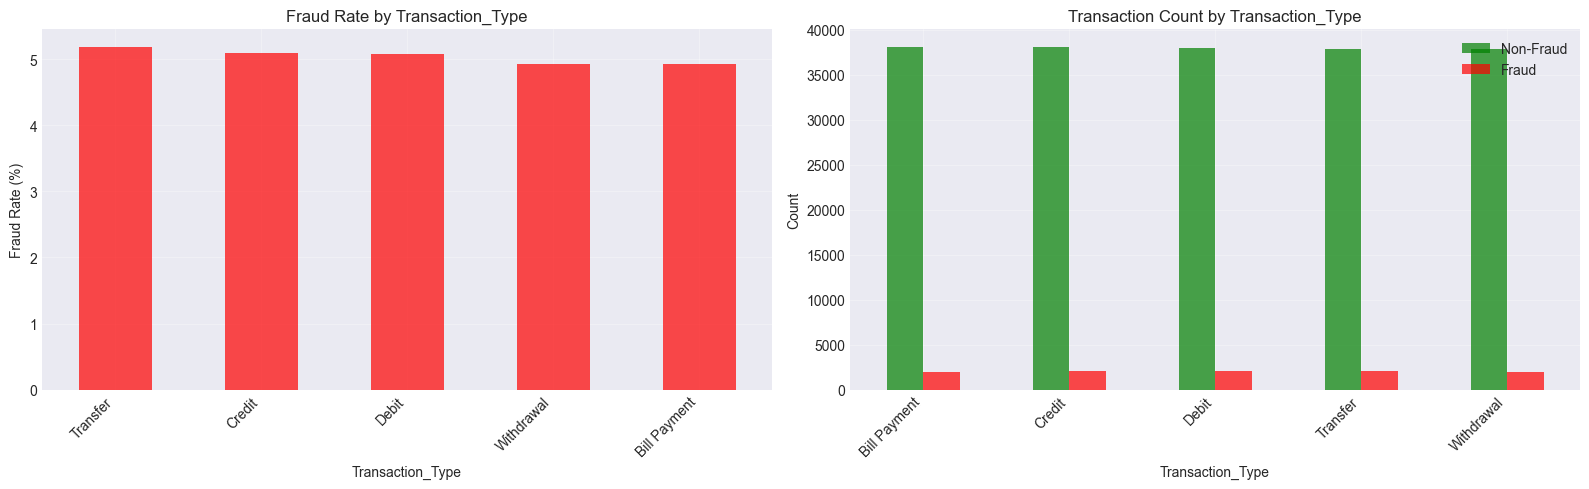


MERCHANT_CATEGORY ANALYSIS
                   Fraud_Count  Total_Count  Fraud_Rate
Merchant_Category                                      
Clothing                  1734        33340       5.201
Groceries                 1722        33187       5.189
Restaurant                1688        33525       5.035
Electronics               1681        33409       5.032
Health                    1651        33118       4.985
Entertainment             1612        33421       4.823


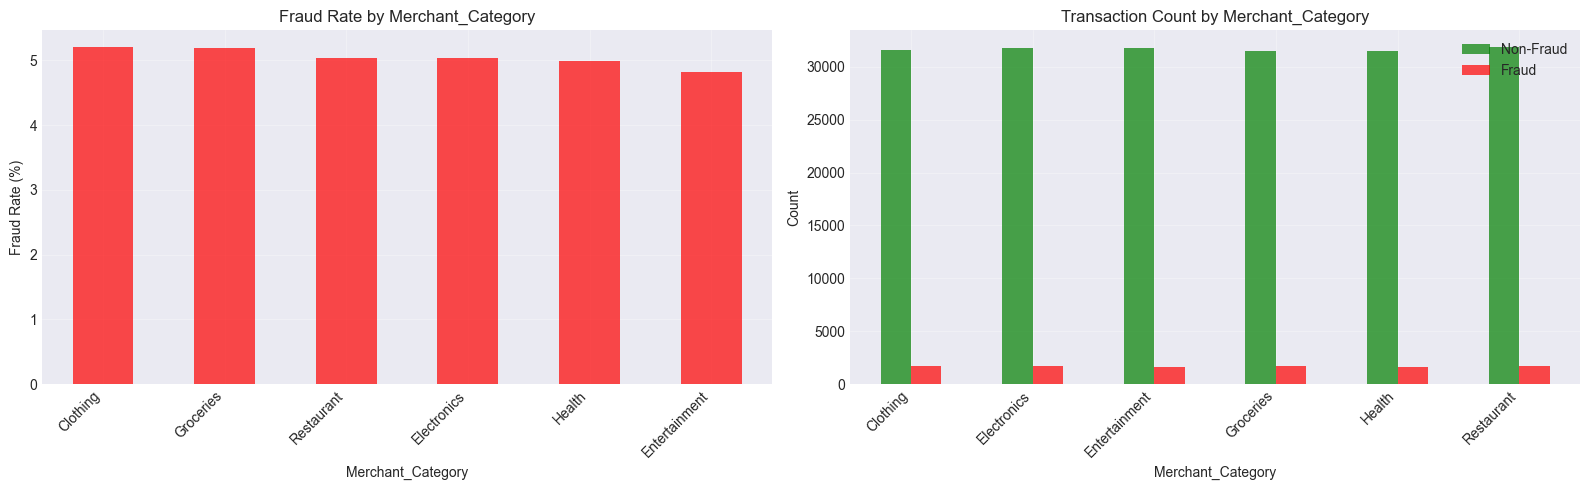


DEVICE_TYPE ANALYSIS
             Fraud_Count  Total_Count  Fraud_Rate
Device_Type                                      
Desktop             2544        49872       5.101
POS                 2533        50111       5.055
ATM                 2518        50055       5.030
Mobile              2493        49962       4.990


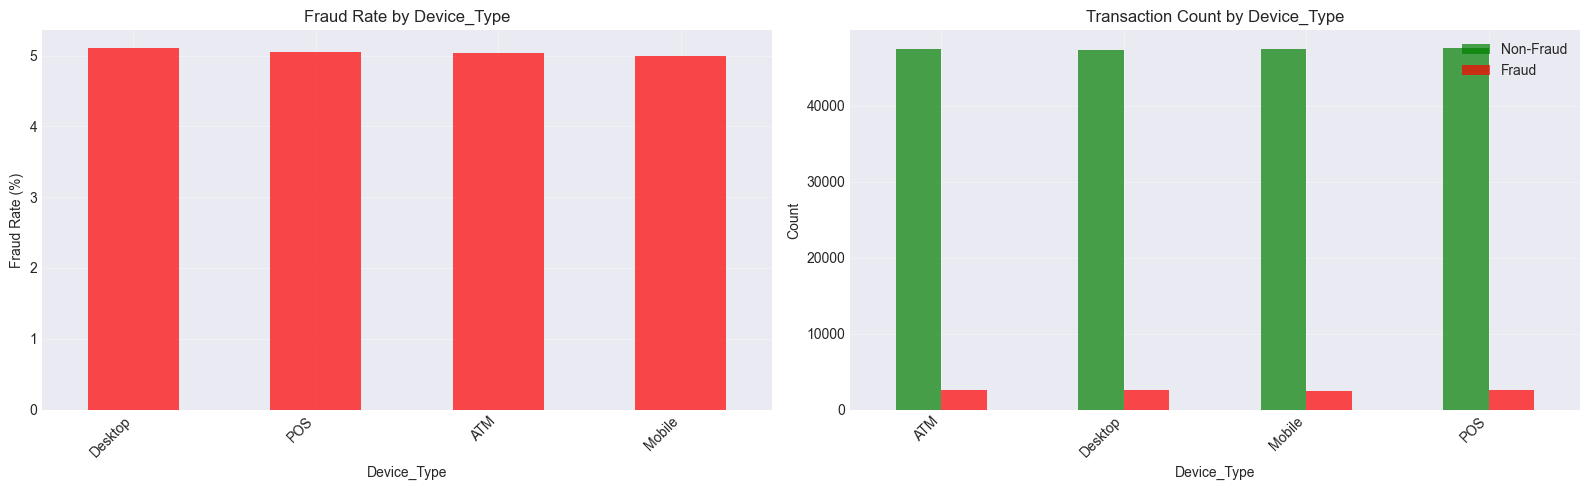


TRANSACTION_DEVICE ANALYSIS
                              Fraud_Count  Total_Count  Fraud_Rate
Transaction_Device                                                
Debit/Credit Card                     455         8273       5.500
Virtual Card                          439         8059       5.447
Biometric Scanner                     429         7952       5.395
Payment Gateway Device                422         7874       5.359
QR Code Scanner                       411         7938       5.178
Voice Assistant                       412         8039       5.125
ATM Booth Kiosk                      1082        21149       5.116
Web Browser                           408         7981       5.112
Desktop/Laptop                        411         8057       5.101
POS Mobile Device                     406         8006       5.071
Smart Card                            411         8133       5.053
Tablet                                407         8059       5.050
Mobile Device                    

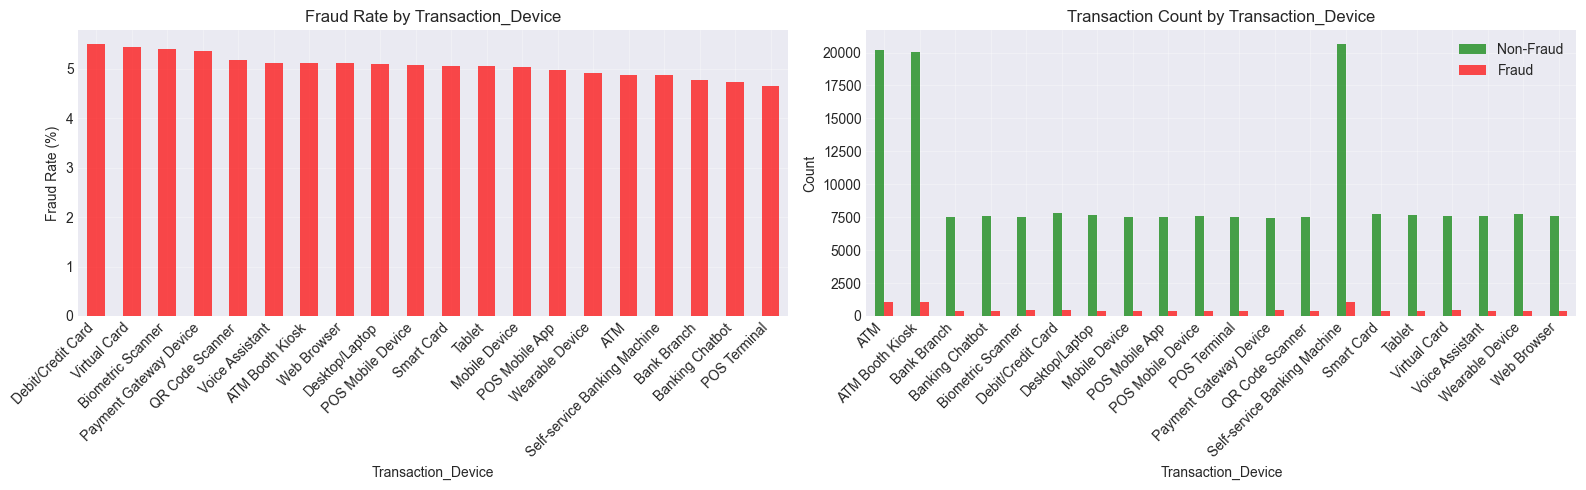

In [9]:
print("="*80)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*80)

# Function to analyze categorical features
def analyze_categorical_feature(df, feature_name):
    print(f"\n{'='*80}")
    print(f"{feature_name.upper()} ANALYSIS")
    print(f"{'='*80}")
    
    # Fraud rate by category
    fraud_analysis = df.groupby(feature_name)['Is_Fraud'].agg(['sum', 'count', 'mean'])
    fraud_analysis.columns = ['Fraud_Count', 'Total_Count', 'Fraud_Rate']
    fraud_analysis['Fraud_Rate'] = fraud_analysis['Fraud_Rate'] * 100
    fraud_analysis = fraud_analysis.sort_values('Fraud_Rate', ascending=False)
    
    print(fraud_analysis)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Fraud rate by category
    fraud_analysis['Fraud_Rate'].plot(kind='bar', ax=axes[0], color='red', alpha=0.7)
    axes[0].set_title(f'Fraud Rate by {feature_name}')
    axes[0].set_ylabel('Fraud Rate (%)')
    axes[0].set_xlabel(feature_name)
    axes[0].grid(True, alpha=0.3)
    plt.sca(axes[0])
    plt.xticks(rotation=45, ha='right')
    
    # Count comparison
    fraud_counts = df[df['Is_Fraud']==1][feature_name].value_counts()
    non_fraud_counts = df[df['Is_Fraud']==0][feature_name].value_counts()
    
    comparison_df = pd.DataFrame({
        'Non-Fraud': non_fraud_counts,
        'Fraud': fraud_counts
    }).fillna(0)
    
    comparison_df.plot(kind='bar', ax=axes[1], color=['green', 'red'], alpha=0.7)
    axes[1].set_title(f'Transaction Count by {feature_name}')
    axes[1].set_ylabel('Count')
    axes[1].set_xlabel(feature_name)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    plt.sca(axes[1])
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    return fraud_analysis

# Analyze key categorical features
features_to_analyze = ['Gender', 'Account_Type', 'Transaction_Type', 
                       'Merchant_Category', 'Device_Type', 'Transaction_Device']

for feature in features_to_analyze:
    analyze_categorical_feature(df, feature)

TIME-BASED ANALYSIS

Fraud Rate by Hour of Day:
      Fraud_Count  Total_Count  Fraud_Rate
Hour                                      
0             447         8399       5.322
1             419         8266       5.069
2             425         8312       5.113
3             436         8329       5.235
4             438         8319       5.265
5             398         8374       4.753
6             431         8321       5.180
7             398         8505       4.680
8             430         8359       5.144
9             431         8156       5.284
10            422         8400       5.024
11            431         8374       5.147
12            384         8213       4.676
13            430         8373       5.136
14            404         8452       4.780
15            435         8424       5.164
16            408         8373       4.873
17            423         8302       5.095
18            432         8295       5.208
19            384         8224       4.669
20    

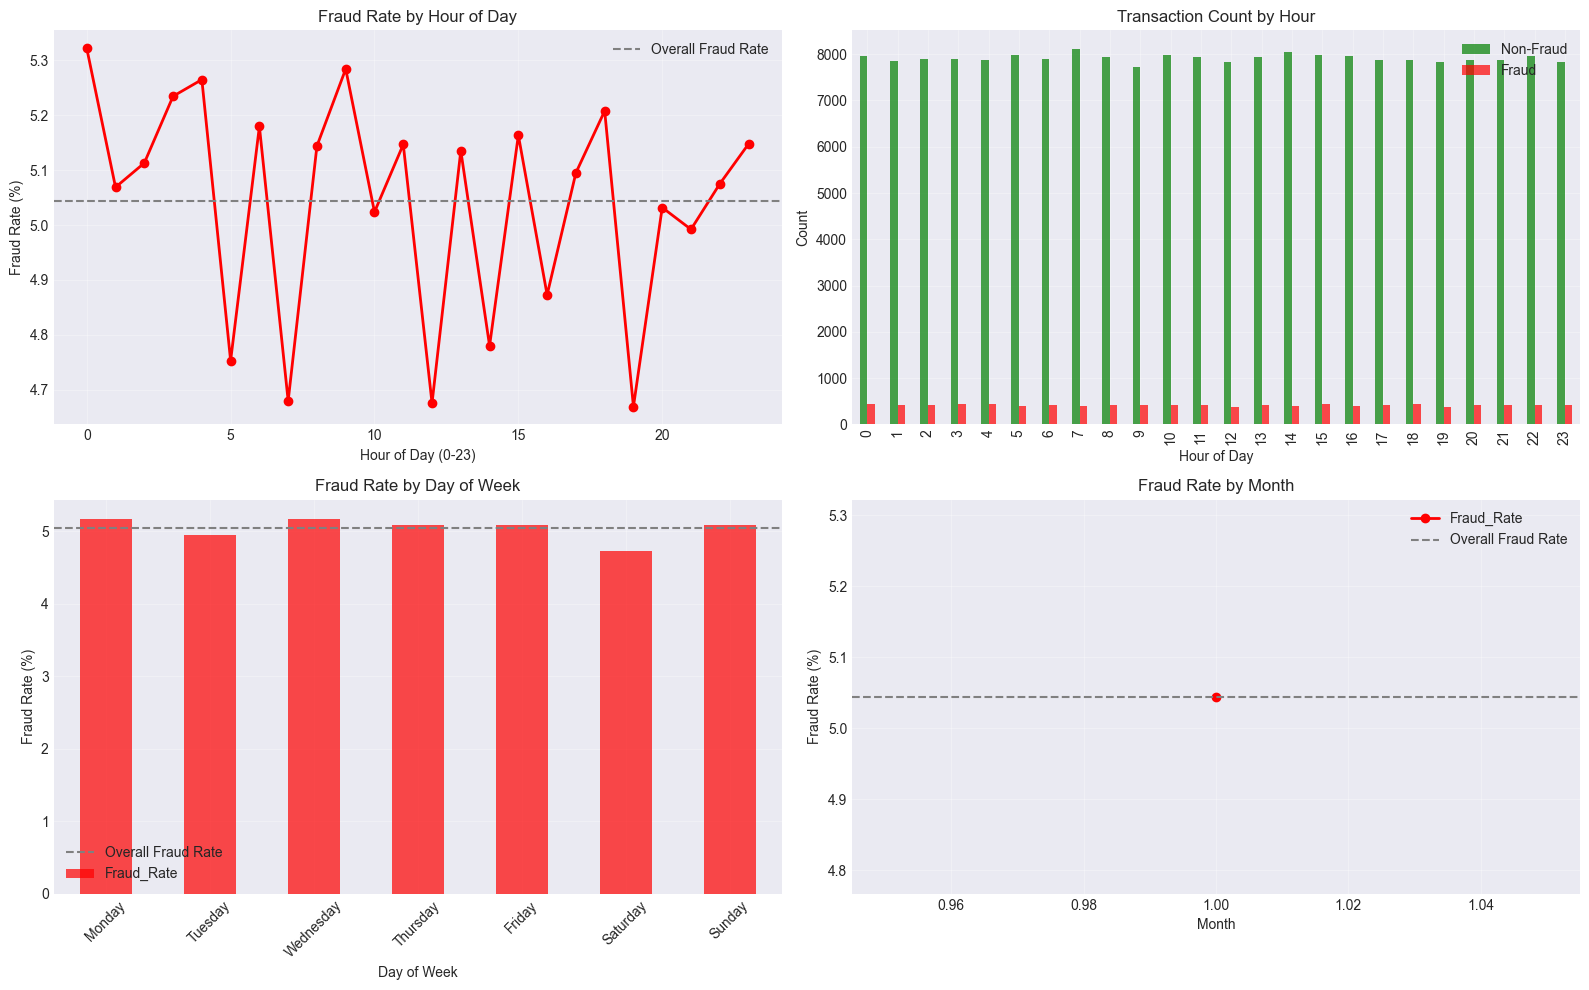


Day of Week Fraud Analysis:
           Fraud_Count  Total_Count  Fraud_Rate
Day_Name                                       
Monday            1374        26557       5.174
Tuesday           1308        26435       4.948
Wednesday         1723        33340       5.168
Thursday          1706        33581       5.080
Friday            1347        26492       5.085
Saturday          1272        26884       4.731
Sunday            1358        26711       5.084


In [10]:
print("="*80)
print("TIME-BASED ANALYSIS")
print("="*80)

# Parse date and time
df['Transaction_DateTime'] = pd.to_datetime(df['Transaction_Date'] + ' ' + df['Transaction_Time'], 
                                             format='%d-%m-%Y %H:%M:%S')

# Extract time components
df['Hour'] = df['Transaction_DateTime'].dt.hour
df['Day_of_Week'] = df['Transaction_DateTime'].dt.dayofweek  # 0=Monday, 6=Sunday
df['Day_Name'] = df['Transaction_DateTime'].dt.day_name()
df['Month'] = df['Transaction_DateTime'].dt.month

# Hour-based fraud analysis
print("\nFraud Rate by Hour of Day:")
hour_fraud = df.groupby('Hour')['Is_Fraud'].agg(['sum', 'count', 'mean'])
hour_fraud.columns = ['Fraud_Count', 'Total_Count', 'Fraud_Rate']
hour_fraud['Fraud_Rate'] = hour_fraud['Fraud_Rate'] * 100
print(hour_fraud)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Fraud rate by hour
axes[0, 0].plot(hour_fraud.index, hour_fraud['Fraud_Rate'], marker='o', 
                color='red', linewidth=2)
axes[0, 0].set_xlabel('Hour of Day (0-23)')
axes[0, 0].set_ylabel('Fraud Rate (%)')
axes[0, 0].set_title('Fraud Rate by Hour of Day')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=5.044, color='gray', linestyle='--', label='Overall Fraud Rate')
axes[0, 0].legend()

# Transaction count by hour
hour_counts = df.groupby(['Hour', 'Is_Fraud']).size().unstack(fill_value=0)
hour_counts.plot(kind='bar', ax=axes[0, 1], color=['green', 'red'], alpha=0.7)
axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Transaction Count by Hour')
axes[0, 1].legend(['Non-Fraud', 'Fraud'])
axes[0, 1].grid(True, alpha=0.3)

# Day of week analysis
day_fraud = df.groupby('Day_Name')['Is_Fraud'].agg(['sum', 'count', 'mean'])
day_fraud.columns = ['Fraud_Count', 'Total_Count', 'Fraud_Rate']
day_fraud['Fraud_Rate'] = day_fraud['Fraud_Rate'] * 100
day_fraud = day_fraud.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                               'Friday', 'Saturday', 'Sunday'])

day_fraud['Fraud_Rate'].plot(kind='bar', ax=axes[1, 0], color='red', alpha=0.7)
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Fraud Rate (%)')
axes[1, 0].set_title('Fraud Rate by Day of Week')
axes[1, 0].axhline(y=5.044, color='gray', linestyle='--', label='Overall Fraud Rate')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
plt.sca(axes[1, 0])
plt.xticks(rotation=45)

# Month analysis
month_fraud = df.groupby('Month')['Is_Fraud'].agg(['sum', 'count', 'mean'])
month_fraud.columns = ['Fraud_Count', 'Total_Count', 'Fraud_Rate']
month_fraud['Fraud_Rate'] = month_fraud['Fraud_Rate'] * 100

month_fraud['Fraud_Rate'].plot(kind='line', ax=axes[1, 1], marker='o', 
                                color='red', linewidth=2)
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Fraud Rate (%)')
axes[1, 1].set_title('Fraud Rate by Month')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=5.044, color='gray', linestyle='--', label='Overall Fraud Rate')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\nDay of Week Fraud Analysis:")
print(day_fraud)

CORRELATION ANALYSIS & ACCOUNT BALANCE

Account Balance Statistics by Fraud Status:
              count      mean       std      min       25%       50%  \
Is_Fraud                                                               
0        189912.000 52437.197 27404.829 5000.820 28723.888 52373.715   
1         10088.000 52452.891 27300.467 5003.420 29122.987 52344.725   

               75%       max  
Is_Fraud                      
0        76148.875 99998.680  
1        76116.033 99999.950  

Transaction to Balance Ratio by Fraud Status:
              count  mean   std   min   25%   50%   75%    max
Is_Fraud                                                      
0        189912.000 1.566 2.034 0.000 0.471 0.944 1.739 19.649
1         10088.000 1.564 2.061 0.000 0.466 0.940 1.708 18.730


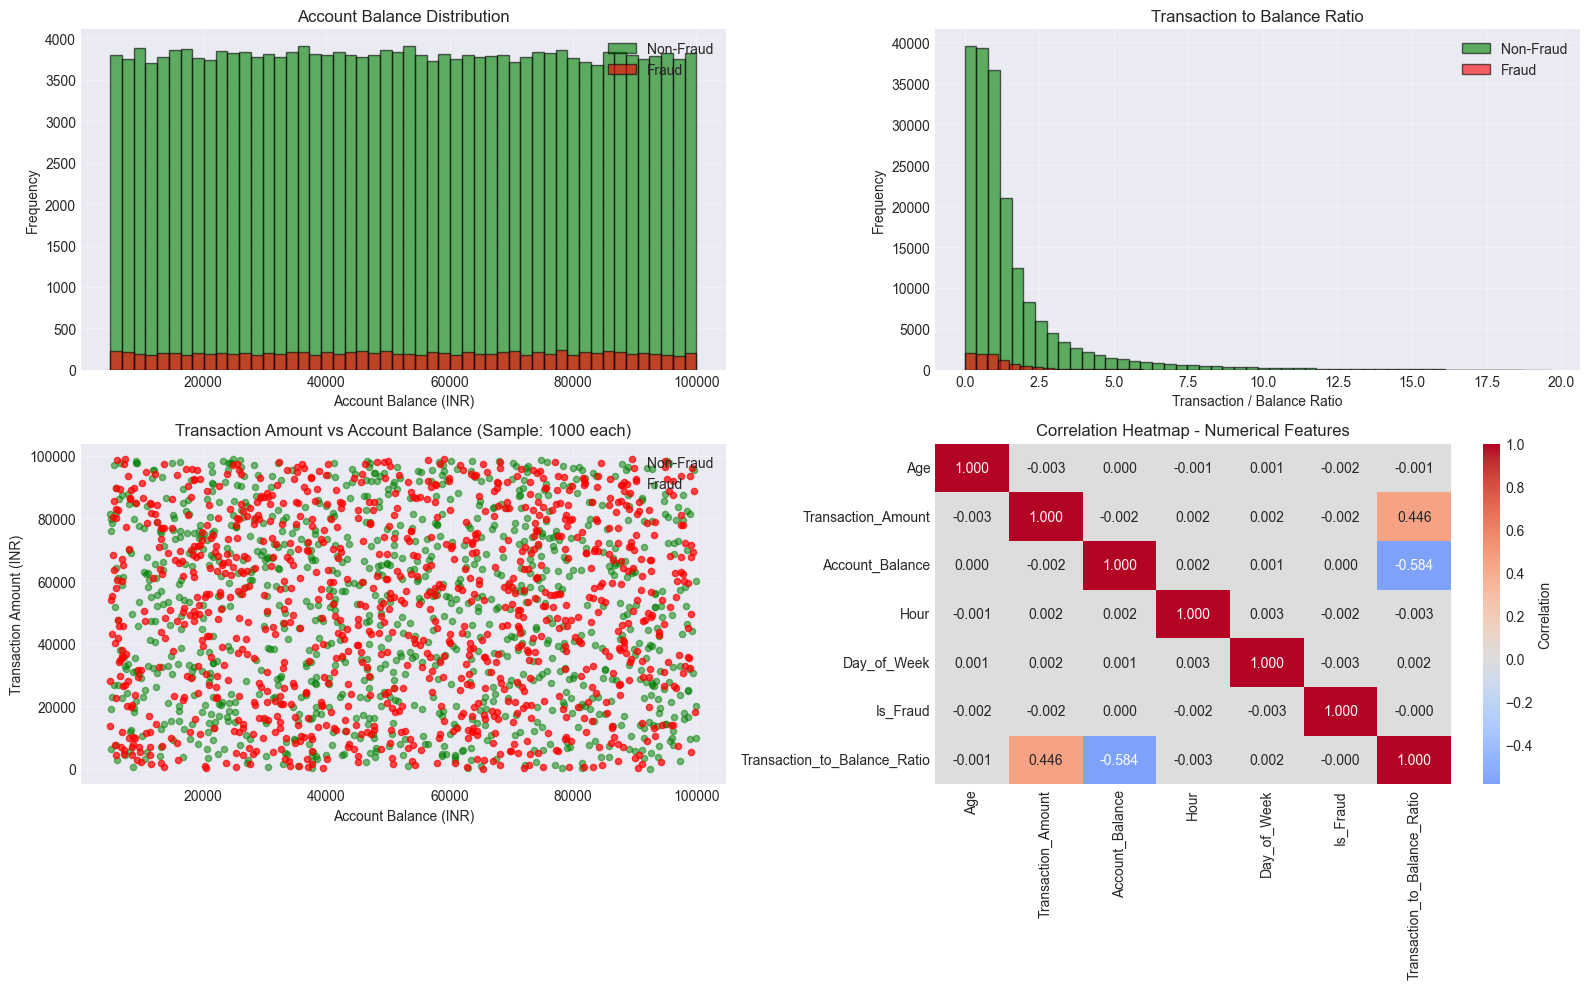


Account Balance T-test Results:
T-statistic: 0.0561
P-value: 0.955293

Transaction/Balance Ratio T-test Results:
T-statistic: -0.1070
P-value: 0.914777


In [11]:
print("="*80)
print("CORRELATION ANALYSIS & ACCOUNT BALANCE")
print("="*80)

# Account Balance vs Transaction Amount
print("\nAccount Balance Statistics by Fraud Status:")
print(df.groupby('Is_Fraud')['Account_Balance'].describe())

# Create a ratio feature: Transaction Amount / Account Balance
df['Transaction_to_Balance_Ratio'] = df['Transaction_Amount'] / df['Account_Balance']

print("\nTransaction to Balance Ratio by Fraud Status:")
print(df.groupby('Is_Fraud')['Transaction_to_Balance_Ratio'].describe())

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Account Balance distribution
axes[0, 0].hist(df[df['Is_Fraud']==0]['Account_Balance'], bins=50, alpha=0.6, 
                label='Non-Fraud', color='green', edgecolor='black')
axes[0, 0].hist(df[df['Is_Fraud']==1]['Account_Balance'], bins=50, alpha=0.6, 
                label='Fraud', color='red', edgecolor='black')
axes[0, 0].set_xlabel('Account Balance (INR)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Account Balance Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Transaction to Balance Ratio
axes[0, 1].hist(df[df['Is_Fraud']==0]['Transaction_to_Balance_Ratio'], bins=50, alpha=0.6, 
                label='Non-Fraud', color='green', edgecolor='black')
axes[0, 1].hist(df[df['Is_Fraud']==1]['Transaction_to_Balance_Ratio'], bins=50, alpha=0.6, 
                label='Fraud', color='red', edgecolor='black')
axes[0, 1].set_xlabel('Transaction / Balance Ratio')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Transaction to Balance Ratio')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Scatter plot: Transaction Amount vs Account Balance
fraud_sample = df[df['Is_Fraud']==1].sample(1000, random_state=42)
non_fraud_sample = df[df['Is_Fraud']==0].sample(1000, random_state=42)

axes[1, 0].scatter(non_fraud_sample['Account_Balance'], 
                   non_fraud_sample['Transaction_Amount'],
                   alpha=0.5, s=20, color='green', label='Non-Fraud')
axes[1, 0].scatter(fraud_sample['Account_Balance'], 
                   fraud_sample['Transaction_Amount'],
                   alpha=0.7, s=20, color='red', label='Fraud')
axes[1, 0].set_xlabel('Account Balance (INR)')
axes[1, 0].set_ylabel('Transaction Amount (INR)')
axes[1, 0].set_title('Transaction Amount vs Account Balance (Sample: 1000 each)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Correlation heatmap for numerical features
numerical_features = ['Age', 'Transaction_Amount', 'Account_Balance', 
                      'Hour', 'Day_of_Week', 'Is_Fraud', 'Transaction_to_Balance_Ratio']
correlation_matrix = df[numerical_features].corr()

import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, ax=axes[1, 1], cbar_kws={'label': 'Correlation'})
axes[1, 1].set_title('Correlation Heatmap - Numerical Features')

plt.tight_layout()
plt.show()

# Statistical test for Account Balance
from scipy import stats
fraud_balance = df[df['Is_Fraud']==1]['Account_Balance']
non_fraud_balance = df[df['Is_Fraud']==0]['Account_Balance']
t_stat, p_value = stats.ttest_ind(fraud_balance, non_fraud_balance)
print(f"\nAccount Balance T-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# Statistical test for Transaction/Balance Ratio
fraud_ratio = df[df['Is_Fraud']==1]['Transaction_to_Balance_Ratio']
non_fraud_ratio = df[df['Is_Fraud']==0]['Transaction_to_Balance_Ratio']
t_stat2, p_value2 = stats.ttest_ind(fraud_ratio, non_fraud_ratio)
print(f"\nTransaction/Balance Ratio T-test Results:")
print(f"T-statistic: {t_stat2:.4f}")
print(f"P-value: {p_value2:.6f}")

In [12]:
print("="*80)
print("EDA SUMMARY - KEY FINDINGS")
print("="*80)

print("\n📊 DATASET OVERVIEW:")
print(f"  • Total Transactions: {len(df):,}")
print(f"  • Fraudulent: {df['Is_Fraud'].sum():,} ({df['Is_Fraud'].mean()*100:.2f}%)")
print(f"  • Non-Fraudulent: {(df['Is_Fraud']==0).sum():,} ({(df['Is_Fraud']==0).mean()*100:.2f}%)")
print(f"  • Imbalance Ratio: 1:{(df['Is_Fraud']==0).sum()/df['Is_Fraud'].sum():.2f}")
print(f"  • Features: {df.shape[1]}")
print(f"  • Missing Values: {df.isnull().sum().sum()}")

print("\n❌ WEAK DISCRIMINATIVE FEATURES:")
print("  • Transaction Amount: NO significant difference (p=0.348)")
print("  • Age: NO significant difference")
print("  • Gender: ~5% fraud rate for both")
print("  • Account Type: 4.94-5.17% (minimal variation)")
print("  • Transaction Type: 4.93-5.19% (minimal variation)")
print("  • Merchant Category: 4.82-5.20% (minimal variation)")
print("  • Device Type: 4.99-5.10% (minimal variation)")
print("  • Hour of Day: 4.67-5.32% (slight variation)")
print("  • Day of Week: 4.73-5.17% (minimal variation)")

print("\n⚠️ SLIGHTLY BETTER FEATURES:")
print("  • Transaction Device: 4.65-5.50% (0.85% range)")
print("     - Debit/Credit Card highest: 5.50%")
print("     - POS Terminal lowest: 4.65%")

print("\n🎯 DATA CHARACTERISTICS:")
print("  • Highly distributed/balanced across categories")
print("  • Likely synthetic/simulated dataset")
print("  • Designed to test class imbalance handling")
print("  • No obvious fraud patterns (realistic scenario)")

print("\n💡 MODELING STRATEGY RECOMMENDATIONS:")
print("  1. ✅ Use FULL dataset (200k rows) - don't downsample!")
print("  2. ✅ Stratified K-Fold Cross-Validation (k=5 or 10)")
print("  3. ✅ Handle imbalance with SMOTE + Class Weights")
print("  4. ✅ Feature Engineering:")
print("     • Transaction/Balance Ratio")
print("     • Time-based features (Hour, Day)")
print("     • Interaction features (Device + Merchant)")
print("  5. ✅ Use Ensemble Models (Random Forest, XGBoost)")
print("  6. ✅ Focus on Recall & F1-Score (not just Accuracy)")
print("  7. ✅ Use AUC-ROC for model comparison")

print("\n📈 EXPECTED MODEL PERFORMANCE:")
print("  • Accuracy: ~95% (but misleading due to imbalance)")
print("  • Recall: Target 85-90% (catch most fraud)")
print("  • Precision: Target 80-85% (minimize false alarms)")
print("  • F1-Score: Target 82-87%")
print("  • AUC-ROC: Target 0.90-0.95")

print("\n" + "="*80)
print("EDA COMPLETE! Ready to move to PREPROCESSING & MODELING")
print("="*80)

EDA SUMMARY - KEY FINDINGS

📊 DATASET OVERVIEW:
  • Total Transactions: 200,000
  • Fraudulent: 10,088 (5.04%)
  • Non-Fraudulent: 189,912 (94.96%)
  • Imbalance Ratio: 1:18.83
  • Features: 31
  • Missing Values: 0

❌ WEAK DISCRIMINATIVE FEATURES:
  • Transaction Amount: NO significant difference (p=0.348)
  • Age: NO significant difference
  • Gender: ~5% fraud rate for both
  • Account Type: 4.94-5.17% (minimal variation)
  • Transaction Type: 4.93-5.19% (minimal variation)
  • Merchant Category: 4.82-5.20% (minimal variation)
  • Device Type: 4.99-5.10% (minimal variation)
  • Hour of Day: 4.67-5.32% (slight variation)
  • Day of Week: 4.73-5.17% (minimal variation)

⚠️ SLIGHTLY BETTER FEATURES:
  • Transaction Device: 4.65-5.50% (0.85% range)
     - Debit/Credit Card highest: 5.50%
     - POS Terminal lowest: 4.65%

🎯 DATA CHARACTERISTICS:
  • Highly distributed/balanced across categories
  • Likely synthetic/simulated dataset
  • Designed to test class imbalance handling
  • No o